**Name: Sparsh Saxena <br>
Slot: L57+58 <br>
BCSE209P Machine Leanring Lab <br>
Lab Assignment - 5 <br>
Submitted To: Ms. R.Jothi <br>
Collab Link: https://colab.research.google.com/drive/1isU-zxYMzx6TPsEw9rbx7qQc9Uslxdq7#scrollTo=0-Wg-K3ajJ9n**



**You are asked to design a machine learning model to decide which crop can be
grown in a particular farm based the farm characteristics such as rainfall, Nitrogen
and Phosphorous values of soil etc.
Apply decision tree algorithm for crop suggestion.**

In [ ]:
!pip install numpy
import numpy as np
import pandas as pd

In [ ]:
# Read Dataset
df = pd.DataFrame(pd.read_csv("Crop.csv"))
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split

x = df.drop("label",axis=1)
y = df["label"]

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=104,test_size=0.25,shuffle=True)

**1. Compare the accuracy with both entropy and gini index for attribute
selection**

In [ ]:
# Using Entropy

from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion="entropy")
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Using Gini

model2 = DecisionTreeClassifier(criterion="gini")
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
print(f"Model Accuracy for Entropy based Decision Tree Classifier: {model1.score(x_test,y_test)*100} %")
print(f"Model Accuracy for Gini based Decision Tree Classifier: {model2.score(x_test,y_test)*100} %")

print("\nThe Model made using Entropy as criterion is very slightly better as compared to the default Gini based Model.")

Model Accuracy for Entropy based Decision Tree Classifier: 98.54545454545455 %
Model Accuracy for Gini based Decision Tree Classifier: 98.18181818181819 %

The Model made using Entropy as criterion is very slightly better as compared to the default Gini based Model.


**2. Verify whether both metrics result in same decision tree by drawing tree
upto a depth level 2.**

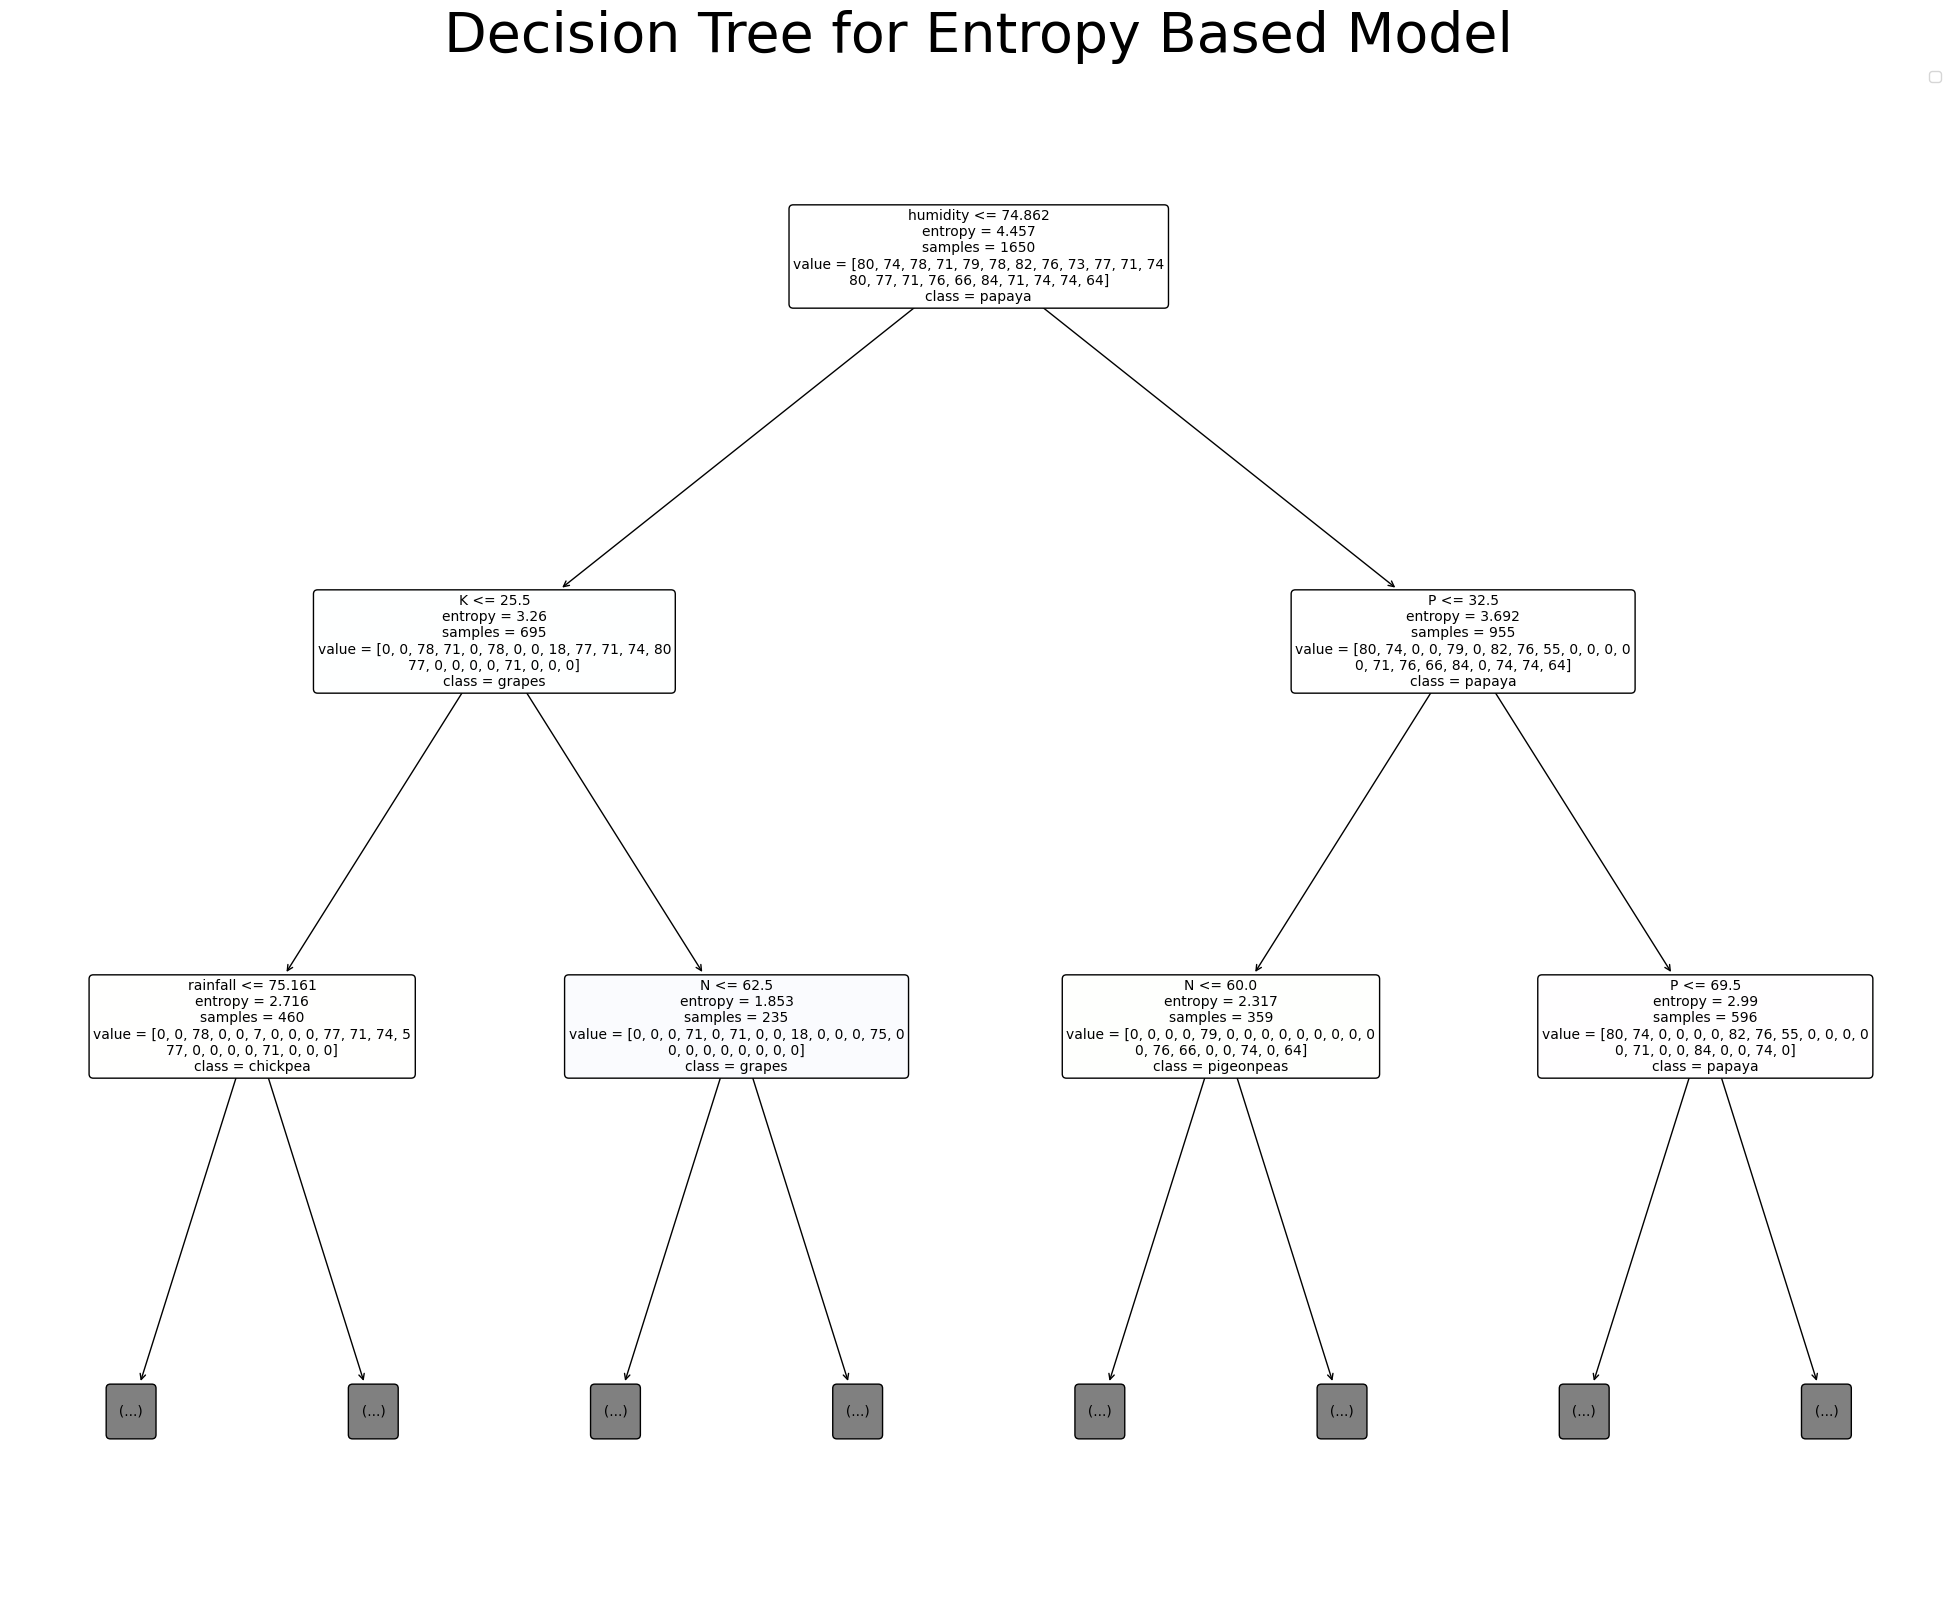

In [ ]:
# Tree Plot for the Entropy Based Tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(25,20))

plot_tree(model1,
         max_depth=2,
         filled=True,
         rounded=True,
         fontsize=10,
         class_names=df["label"].unique().tolist(),
         feature_names=["N","P","K","temperature","humidity","ph","rainfall"])

if len(model1.classes_) > 2:
    plt.legend()

plt.title("Decision Tree for Entropy Based Model",size=40)
plt.show()

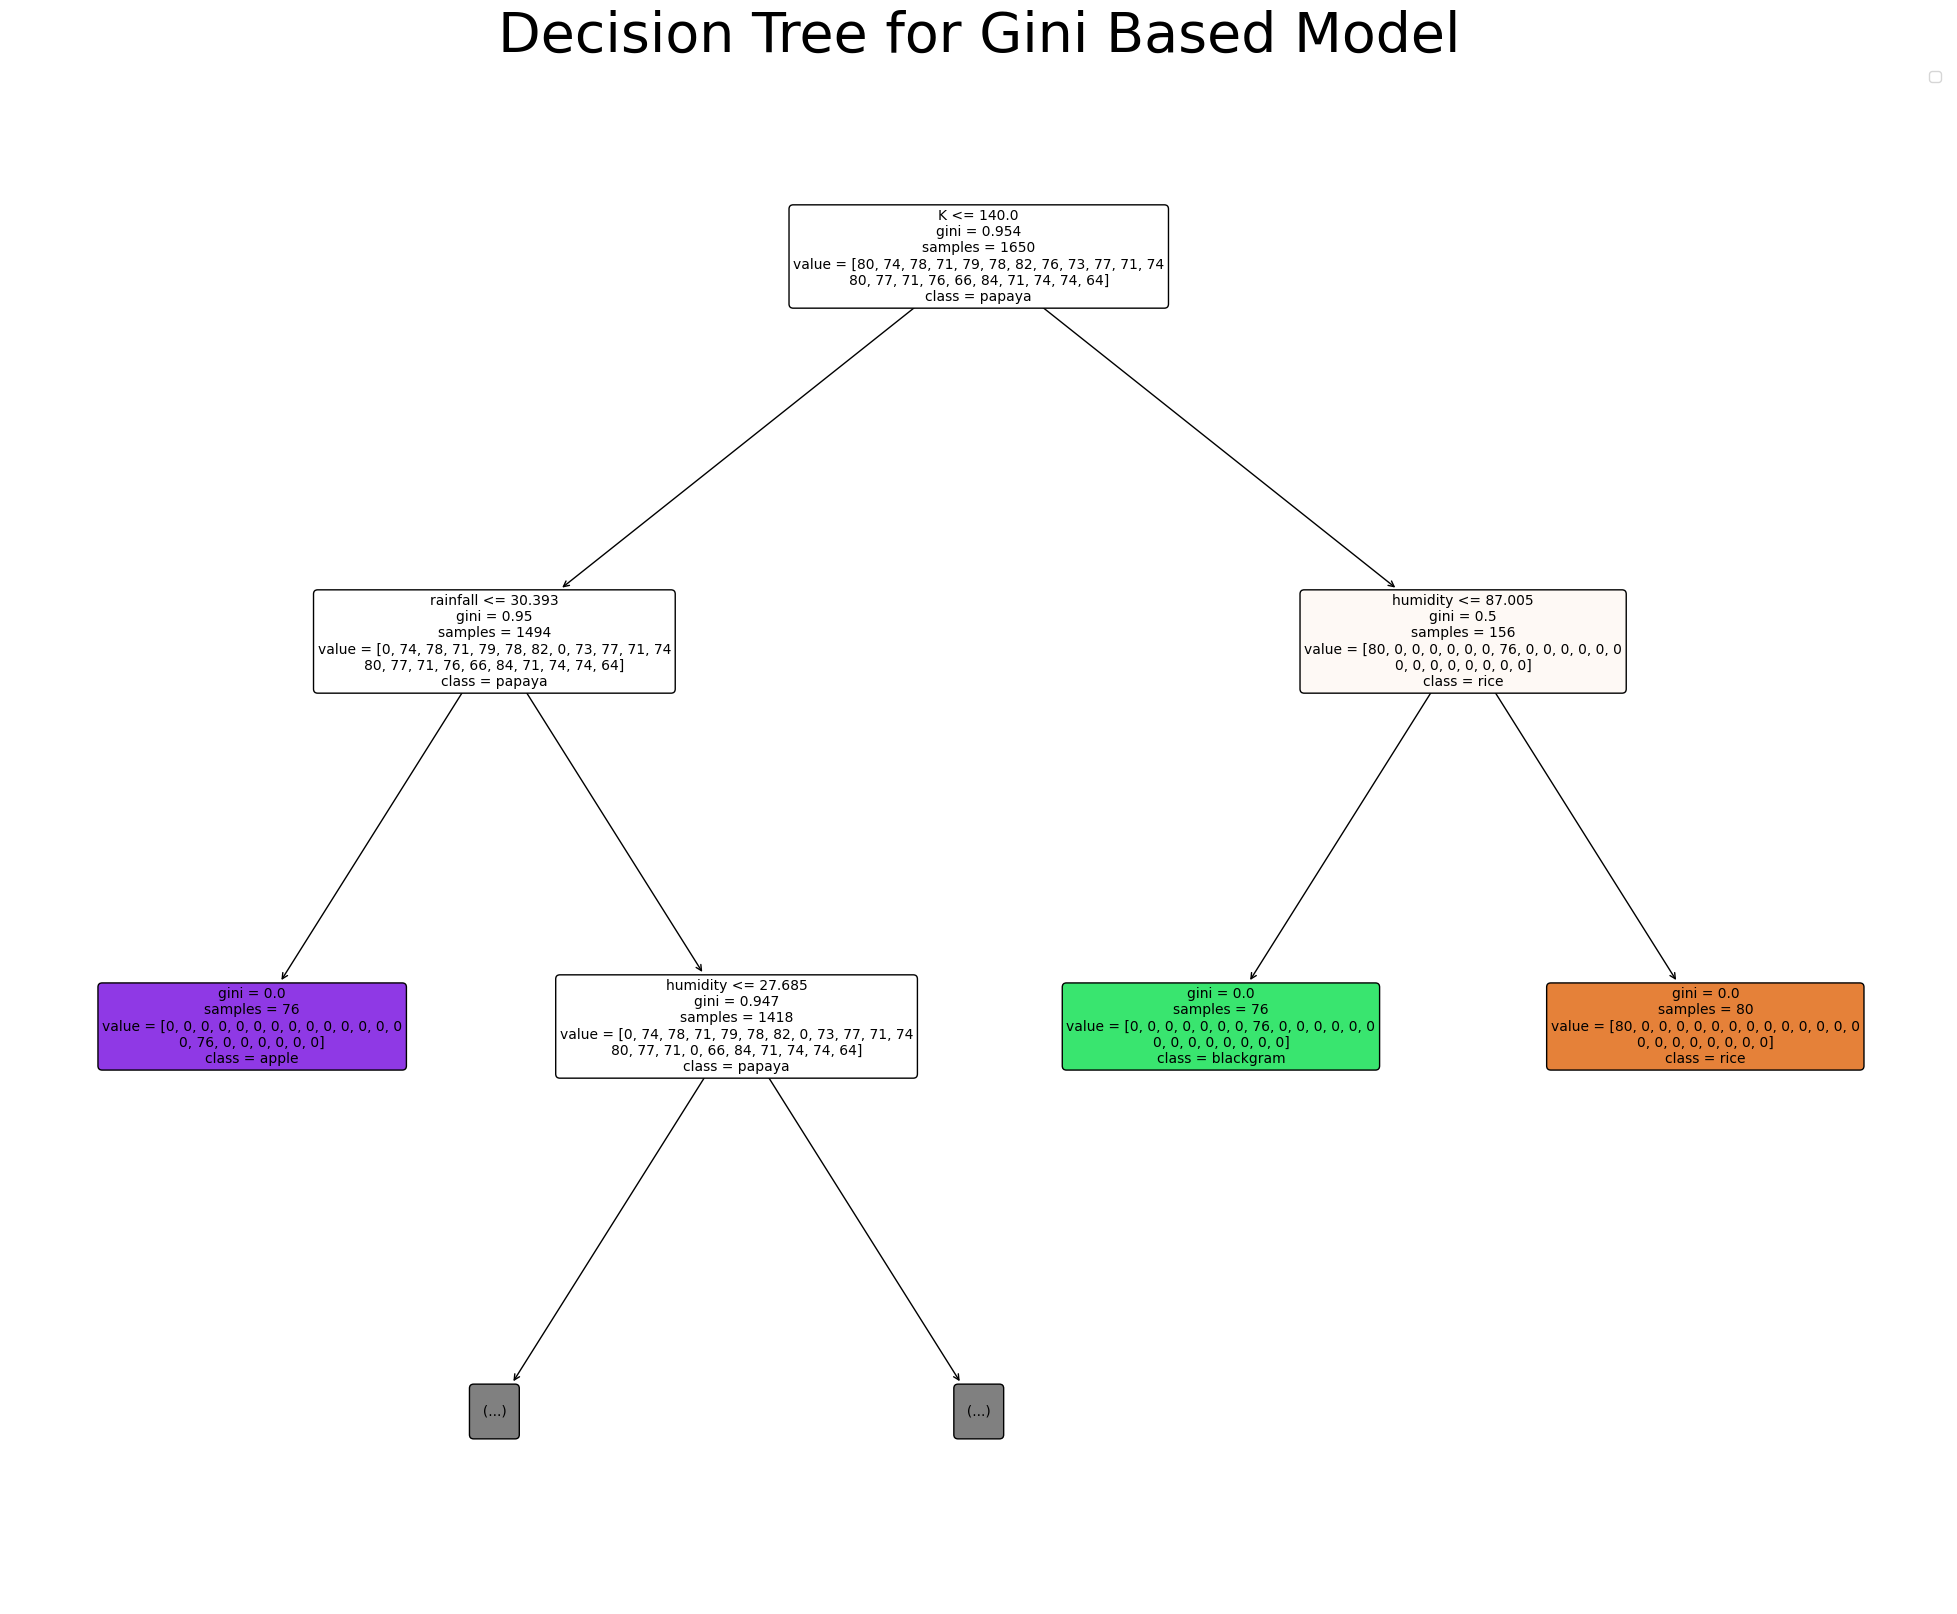

In [ ]:
# Tree Plot for the Gini Based Tree

plt.figure(figsize=(25,20))

plot_tree(model2,
         max_depth=2,
         filled=True,
         rounded=True,
         fontsize=10,
         class_names=df["label"].unique().tolist(),
         feature_names=["N","P","K","temperature","humidity","ph","rainfall"])

if len(model2.classes_) > 2:
    plt.legend()

plt.title("Decision Tree for Gini Based Model",size=40)
plt.show()

In [ ]:
print("Inference: The Decision-Tree made using Entropy is more complex breadth and depth-wise as compared to the Gini one.")

Inference: The Decision-Tree made using Entropy is more complex breadth and depth-wise as compared to the Gini one.
